Will do 3 projects using ANN:
1. `Binary` Classification
2. `Multiclass` Classification
3. `Regression`

<center> <h2 style="background-color:orange; color:white" ><br>Neural Networks<br></h2></center>

[CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/optimization-2/)

## Types of Neural Networks

5 main types are:
1. **`Multi Layer Perceptron`** ==> Simple type of `ANN`
    * MLP can be used in Classification and Regression types of Problems
    * If you want to capture non-linear relationships
        * Add more hiddent layers and you will capture more hidden relationship
2. **`CNN`** ==> mostly used in `Image and Video processing`
    * type of ANN having atlest one layer of Convolution in it
    * input layer --> Convulation layer --> pading layer --> fully connected layer --> output layer [pooling can't be ignored]
* Above two NN are FeedForword type, but in RNN results FeedsBacword inside Hidden layers
3. **`RNN`** ==> mostly used in NLP
    1. `LSTM`** ==> Good variation of RNN
4. **`Auto Encoders`** ==> used in cases where one dont want to loose quality
    * Compress an image/file/video without loosing quality of that image
    * `input layers` and `output layers` will have equal number of nodes but `hidden layers` will have less nodes
5. **`GAN`** ==> ANN can imagin
    * Lan goodfellow
    * All about Generator[generate somthing] and Discriminator[discriminate if generated somthing is fake or real]
        * AIM: `Generator have to fool discriminator`

<center> <h4 style="background-color:orange; color:white" ><br>Perceptron<br></h4></center>

Perceptron is the fundamental think of deep learning
1. `What is a Perceptron?`
2. `Traning a Perceptron`
3. `What are some problem in Perceptron?? Why multi-layer Perceptron???`
4. `Why are multi-layer Perceptron?`

* Perceptron is an algorith/mathematical model/mathematical function like Linear Regression or Logistic Regression
    * It is a binary classifier
* Used for ==> Supervised Machine Learning
* Because of it's design it becomes building block of deep learning

Perceptron training(learning) means telling `weights` and `biases` to Perceptron
* `weights` ==> tells feature importance

[perceptron-learning-algorithm-how-it-works Link](https://www.upgrad.com/blog/perceptron-learning-algorithm-how-it-works/)<br>
[single-layer-perceptron-in-tensorflow Link](https://www.javatpoint.com/single-layer-perceptron-in-tensorflow)

* Perceptron can't capture non-linear relationships

<center> <h4 style="background-color:orange; color:white" ><br>Forward Propogation<br></h4></center>

**`How a NN predicts output?`**

<center> <h4 style="background-color:orange; color:white" ><br>Back Propogation<br></h4></center>



**`AIM`** is to Solve a `Binary Classification Problem` using `ANN`

In [60]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [61]:
import numpy as np
import pandas as pd

In [62]:
path = '/content/'
data = pd.read_csv(path+'Churn_Modelling.csv')

In [63]:
data.shape

(10000, 14)

In [64]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
data.duplicated().sum()

np.int64(0)

Imbalanced Problem

In [67]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [68]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [69]:
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [70]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [71]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

In [72]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [73]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

train_x_scal = scal.fit_transform(train_x)
test_x_scal = scal.fit_transform(test_x)

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

There will be:
1. 1 input layer
2. 1 hidden layer ==> will put 3 nodes/perceptron in hidden layer
3. 1 output layer

In [75]:
model = Sequential()

#input layer
model.add(Dense(3,activation='sigmoid',input_dim=11))
#output layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

**`model compilation stage`**<br>
1. Decide which loss function to use
2. Decide which optimizer to use for Gradean Descent

In [77]:
#binary_crossentropy or can say log loss
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [78]:
hist = model.fit(train_x_scal, train_y,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7784
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6050
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5289
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4886
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4680
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4519
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4497
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4383
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4454
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4342


In [79]:
hist.history

{'loss': [0.7250163555145264,
  0.5820127725601196,
  0.5177384614944458,
  0.4847390055656433,
  0.46544113755226135,
  0.45292985439300537,
  0.44415175914764404,
  0.43767744302749634,
  0.4329115152359009,
  0.4293796420097351]}

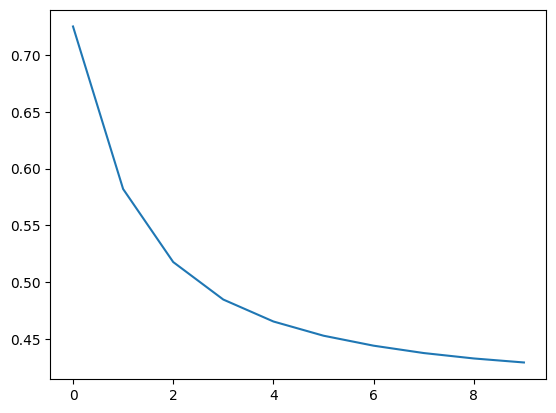

In [80]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

Here we have all `Weights and Biases` of our model <br>
Lets check all `Weights and Biases` of model now


In [81]:
#weights and biasee for layer 0
model.layers[0].get_weights()

[array([[ 0.3892536 ,  0.00497051,  0.22688158],
        [ 0.46816304,  1.1288388 , -1.2496789 ],
        [-0.23448531, -0.35571873, -0.0648507 ],
        [ 0.04294717,  0.3361394 , -0.2900143 ],
        [-0.6230986 , -0.00434586,  0.05622215],
        [-0.23772772,  0.14238933,  0.04403622],
        [-0.86723334, -0.7432035 ,  0.47742403],
        [ 0.10038556,  0.02324229, -0.01402143],
        [ 0.5133293 ,  0.50767577, -0.4118377 ],
        [ 0.02919864,  0.05391569,  0.04719143],
        [-0.62386596, -0.77093774,  0.24894068]], dtype=float32),
 array([-0.6006104 , -0.51289195,  0.73871297], dtype=float32)]

In [82]:
#weights and biasee for layer 1
model.layers[1].get_weights()

[array([[ 0.56313336],
        [ 0.49321085],
        [-1.9177773 ]], dtype=float32),
 array([-0.7222302], dtype=float32)]

In [83]:
#predictions
model.predict(test_x_scal)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.19440146],
       [0.11804365],
       [0.13687517],
       ...,
       [0.1188807 ],
       [0.12209463],
       [0.09183843]], dtype=float32)

We are using sigmoid and this output is thats why in prob not classes <br>
To find exact threshold we use AUC-ROC curve but for now say 5

In [84]:
#output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.7995

**`How to change ANN Architecture for more accuracy improvement`** <br>
This can be improved by:
1. Hidden layer activation fucntion to `ReLue`
2. Increase Epoch to `1000`
3. Increase number of nodes in Hidden layer say `8` or 10
4. Increase number of Hidden Layers  ==> can lead to overfitting

In [86]:
model = Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
#binary_crossentropy or can say log loss
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(train_x_scal, train_y,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6193 - loss: 0.6632 - val_accuracy: 0.8100 - val_loss: 0.4972
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4866 - val_accuracy: 0.8219 - val_loss: 0.4318
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4318 - val_accuracy: 0.8319 - val_loss: 0.4039
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8269 - loss: 0.4071 - val_accuracy: 0.8388 - val_loss: 0.3872
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3790 - val_accuracy: 0.8450 - val_loss: 0.3774
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3605 - val_accuracy: 0.8481 - val_loss: 0.3707
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.3604 - val_accuracy: 0.8487 - val_loss: 0.3649
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3540 - val_accu

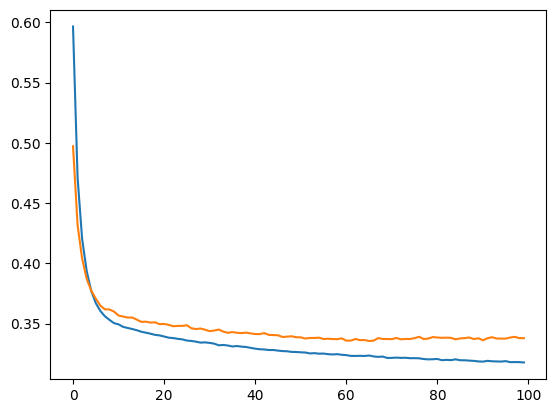

In [88]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

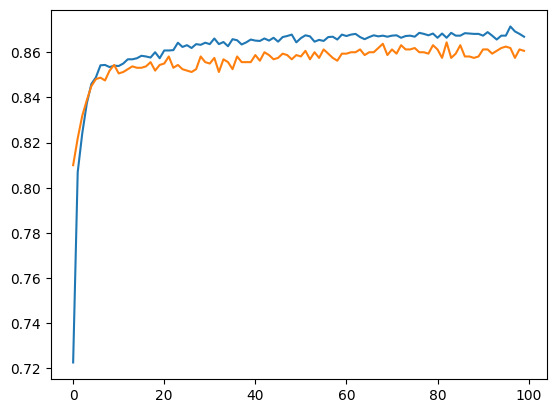

In [89]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

Overfitting
1. Regularization
2. Dropout can be used

In [90]:
#output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [91]:
accuracy_score(test_y,y_pred)

0.852

<center> <h4 style="background-color:orange; color:white" ><br>MultiClass Classification Problem using ANN<br></h4></center>

Will use MNIST dataset here we have:
1. 70k images
2. Each image shape is `28*28` i.e `784 pixels` for every image

----
* `Input layer` ==> `784 nodes [one node for each pixel]` => i.e. each pixel will have one input node
    * `weights & biases` ==> 784 * 128 + 128
* `Hidden Layer` ==> `128 nodes`
    * `weights & biases` ==> 128 * 10 + 10
* `Output layer` ==> `10 nodes` ==> i.e. one node for each class say from 0 to 9 <== multiclass classification problem

In [92]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [93]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [94]:
x_train.shape

(60000, 28, 28)

There are `60k images` with each image of dimension `28*28` in train set, rest of `10k images` are in x_test

In [95]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Data is in form of pixels

In [96]:
#pixels value of first image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Image pixels are saved row wise <br>
Lets see image now

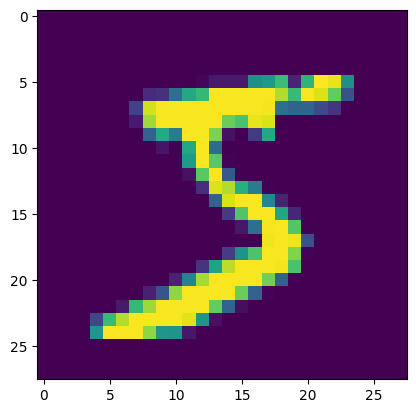

In [97]:
plt.imshow(x_train[0])
plt.show()

**`AIM is to make a NN that will understand based on pixels values which digit is in given image`**<br>
See above arrays they have values ranging from `0-255` which need to be grounded to a range of `0-1` Why??<br>
* It will help NN to converge faster i.e learn weights and biases fast

Lets divide all values with 255

In [98]:
x_train = x_train / 255
x_test = x_test / 255

In [99]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

All values are in range of 0 to 1 now <br>
`Lets make a ANN now`

Some problem:
1. data is in form of 2-D araay ==> 28*28

But we have 784 input nodes so we have to flatten above data and reshape it from this shape 28*28 to this shape 784

In [100]:
from tensorflow.keras.layers import Dense,Flatten

Flatten layer convers high dimensions layer to 1-D

In [101]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #changing 28*28 to 784 nodes
model.add(Dense(128,activation='relu')) #no need to given number of input as Flatten output will become input bydefault
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**`NOTE`**<br>
If you have more then 1 node in output ==> use softmax for classification

In [102]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

* (input)784 * 128(nodes) + 128(biases) ==> `100480` <== trainable params
* (hidden layer node)128 * 10(output layer nodes) + 10(biases) ==> `1290` <== trainable params

In [103]:
#model compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#train model
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8718 - loss: 0.4685 - val_accuracy: 0.9527 - val_loss: 0.1585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9605 - loss: 0.1360 - val_accuracy: 0.9639 - val_loss: 0.1193
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9740 - loss: 0.0894 - val_accuracy: 0.9697 - val_loss: 0.1015
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9813 - loss: 0.0621 - val_accuracy: 0.9704 - val_loss: 0.0940
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0494 - val_accuracy: 0.9728 - val_loss: 0.0900
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.9732 - val_loss: 0.0926
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9927 - loss: 0.0240 

* in `sparse_categorical_crossentropy` ==> no need to one-hot encode labels i.e. 0 to 9
* in `categorical_crossentropy` ==> need to one-hot encode labels i.e. 0 to 9

In [104]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


It is giving probability for different number from 0 to 9 <br>
Aim to find out which number is the given input off, so :
* take out max value index position out of above array

In [105]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [106]:
accuracy_score(y_test,y_pred)

0.9749

**`How to change ANN Architecture for more accuracy improvement`** <br>
This can be improved by:
1. Hidden layer activation fucntion
2. Increase Epoch to `1000`
3. Increase number of nodes in Hidden layer say `2`
4. Increase number of Hidden Layers  ==> can lead to overfitting

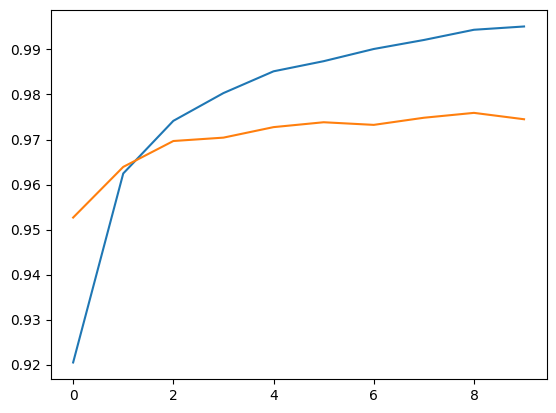

In [107]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

Overfitting

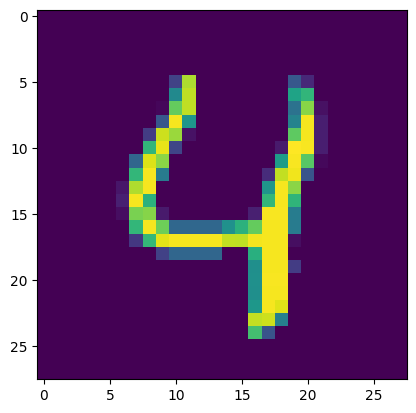

In [108]:
plt.imshow(x_test[4])

In [109]:
# lets see how it is predicting
model.predict(x_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([4])

<center> <h4 style="background-color:orange; color:white" ><br>Regression Problem using ANN<br></h4></center>

In [110]:

data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.shape

(500, 9)

In [111]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [112]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [114]:
data.drop(columns=['Serial No.'],inplace=True)

In [115]:
data.shape

(500, 8)

In [116]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [117]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 7), (400,), (100, 7), (100,))

In [118]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_x_scale = scale.fit_transform(train_x) #scaled np array
test_x_scale = scale.fit_transform(test_x)   #scaled np array

In [119]:
 model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear')) #as this is Regression problem

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3254 - val_loss: 1.1905
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1452 - val_loss: 0.9849
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9627 - val_loss: 0.8173
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7805 - val_loss: 0.6853
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6670 - val_loss: 0.5774
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5585 - val_loss: 0.4884
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4762 - val_loss: 0.4129
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3977 - val_loss: 0.3473
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3194 - val_loss: 0.2911
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2705 - val_loss: 0.2422


In [122]:
#prediction
y_pred = model.predict(test_x_scale)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [123]:
from sklearn.metrics import r2_score

r2_score(test_y,y_pred)

-13.78051636440521

Performance is not that good <br>
Lets upgrade it's architecture

In [124]:
 model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.1396 - val_loss: 0.9014
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9186 - val_loss: 0.7799
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8141 - val_loss: 0.6881
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7069 - val_loss: 0.6198
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6236 - val_loss: 0.5668
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5692 - val_loss: 0.5216
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5547 - val_loss: 0.4802
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4927 - val_loss: 0.4436
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4659 - val_loss: 0.4110
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4028 - val_loss: 0.3822
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4084 - val_loss: 0.3506
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

In [127]:
#prediction
y_pred = model.predict(test_x_scale)

r2_score(test_y,y_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


0.7333231102968779

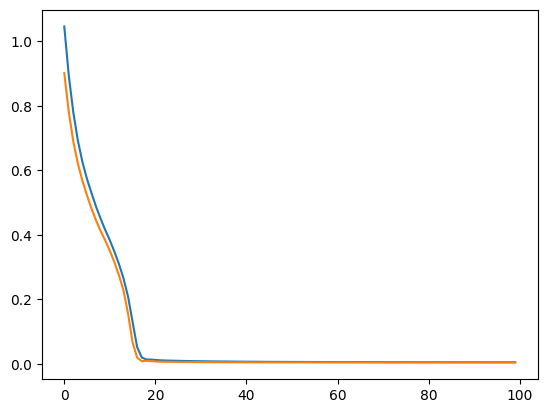

In [128]:
#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()